In [1]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
# from adjustText import adjust_text


In [2]:
!cp -s /data2/wangxuedong/mhc_test_data/race/mhc.csv ../csvfiles/mhc_race.csv
!cp -s /data2/wangxuedong/mhc_test_data/csvfiles/posmhc.csv ../csvfiles/posmhc_all.csv

cp: cannot create symbolic link '../csvfiles/mhc_race.csv' to '/data2/wangxuedong/mhc_test_data/race/mhc.csv': No such file or directory
cp: cannot create symbolic link '../csvfiles/posmhc_all.csv' to '/data2/wangxuedong/mhc_test_data/csvfiles/posmhc.csv': No such file or directory


In [2]:
filtered = pd.read_csv('/home/lishiying/data6/SPIDER-paper/notebook_xzy/filtered_table1.csv')
filtered = filtered.loc[filtered['MHC region?'] == 'Yes', ['Race', 'Start', 'End']].to_numpy()
filtered
# transform data in filtered to mhc_race_positions_dict
mhc_race_positions_dict = {}
for i in range(len(filtered)):
    filtered_i = filtered[i]
    if filtered_i[0] not in list(mhc_race_positions_dict.keys()):
        mhc_race_positions_dict[filtered_i[0]] = {'mhc': [[filtered_i[1], filtered_i[2]]]}
    else:
        mhc_race_positions_dict[filtered_i[0]]['mhc'].append([filtered_i[1], filtered_i[2]])
mhc_race_positions_dict

{'ACB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'All': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'ASW': {'mhc': [[31052133, 31528792], [32212726, 32882258]]},
 'BEB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CDX': {'mhc': [[32212726, 32923168]]},
 'CEU': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'CHB': {'mhc': [[29720403, 29913914],
   [29939668, 30154438],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CHS': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32397207, 32882258]]},
 'CLM': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ESN': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32423532, 32882258]]},
 'FIN': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GBR': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GIH': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GWD': {'

In [3]:

# mhc_race_positions_dict={'ACB': {'mhc': [[29720403, 30011739],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#   'All':{'mhc':[[29720403, 29913914], [30994370, 31528792], [32212726, 32882258]]},
#  'ASW': {'mhc': [[29720403, 30120966],
#    [31052133, 31528792],
#    [32212726, 32882258]]},
#  'BEB': {'mhc': [[29720403, 30011739],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'CDX': {'mhc': [[30994370, 31528792], [32212726, 32923168]]},
#  'CEU': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
#  'CHB': {'mhc': [[29720403, 29913914],
#    [29939668, 30154438],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'CHS': {'mhc': [[29720403, 29896285],
#    [30994370, 31528792],
#    [32397207, 32882258]]},
#  'CLM': {'mhc': [[29720403, 29913914],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'ESN': {'mhc': [[29720403, 30120966],
#    [30994370, 31528792],
#    [32423532, 32882258]]},
#  'FIN': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
#  'GBR': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
#  'GIH': {'mhc': [[29720403, 29913914],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'GWD': {'mhc': [[29720403, 30120966],
#    [31052133, 31528792],
#    [32212726, 32882258]]},
#  'IBS': {'mhc': [[29720403, 29896285],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'ITU': {'mhc': [[29720403, 30011739],
#    [31052133, 31528792],
#    [32212726, 32882258]]},
#  'JPT': {'mhc': [[29720403, 29913914],
#    [29939668, 30120966],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'KHV': {'mhc': [[29720403, 30120966],
#    [30994370, 31528792],
#    [32212726, 32923168]]},
#  'LWK': {'mhc': [[29720403, 30011739],
#    [31052133, 31528792],
#    [32397207, 32923168]]},
#  'MSL': {'mhc': [[29720403, 30011739],
#    [30959575, 31528792],
#    [32212726, 32882258]]},
#  'MXL': {'mhc': [[29720403, 29913914],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'PEL': {'mhc': [[29720403, 29913914],
#    [30959575, 31528792],
#    [32288923, 32882258]]},
#  'PJL': {'mhc': [[29720403, 29913914],
#    [30994370, 31528792],
#    [32212726, 32923168]]},
#  'PUR': {'mhc': [[29720403, 30011739],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'STU': {'mhc': [[29720403, 29913914],
#    [30994370, 31577278],
#    [32212726, 32882258]]},
#  'TSI': {'mhc': [[29720403, 29913914],
#    [29939668, 30120966],
#    [30994370, 31528792],
#    [32212726, 32882258]]},
#  'YRI': {'mhc': [[29720403, 30120966],
#    [30994370, 31528792],
#    [32212726, 32882258]]}}

In [3]:
df_all_mhc=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/csvfiles/mhc.csv")
df_all_mhc

Unnamed: 0        PA        PB       PAB         P
0         29720403  0.770586  0.229414  0.338428  0.317063
1         29720508  0.875234  0.124766  0.209607  0.197182
2         29720509  0.999064  0.000936  0.001248  0.000520
3         29720635  0.997973  0.002027  0.003431  0.002614
4         29720654  0.999064  0.000936  0.001248  0.000520
...            ...       ...       ...       ...       ...
108906    33129837  0.691360  0.308640  0.394573  0.349929
108907    33129865  0.997037  0.002963  0.005303  0.004474
108908    33129951  0.999064  0.000936  0.001248  0.000520
108909    33129973  0.992358  0.007642  0.014036  0.012467
108910    33129982  0.999064  0.000936  0.001248  0.000520

[108911 rows x 5 columns]

In [4]:
df_race_mhc=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/race/posmhc.csv")
df_race_mhc            

Unnamed: 0       ACB       ASW       BEB       CDX       CEU  \
0         29720403  0.343344  0.224344  0.286216  0.492784  0.221521   
1         29720508  0.288125  0.173056  0.145840  0.147176  0.085134   
2         29720509  0.000404  0.000961  0.000319  0.000620  0.000173   
3         29720635  0.015052  0.000961  0.000319  0.000620  0.000173   
4         29720654  0.000404  0.000961  0.000319  0.000620  0.000173   
...            ...       ...       ...       ...       ...       ...   
108906    33129837  0.338902  0.282408  0.253823  0.333591  0.651601   
108907    33129865  0.000404  0.000961  0.020462  0.000620  0.000173   
108908    33129951  0.000404  0.000961  0.000319  0.000620  0.000173   
108909    33129973  0.007335  0.000961  0.020462  0.000620  0.000173   
108910    33129982  0.000404  0.000961  0.013258  0.000620  0.000173   

             CHB       CHS       CLM       ESN  ...       KHV       LWK  \
0       0.355220  0.318584  0.280589  0.442880  ...  0.343460  0.390530   
1       0.253164  0.122188  0.126818  0.331558  ...  0.291104  0.295362   
2       0.000509  0.000208  0.000314  0.000248  ...  0.000366  0.000549   
3       0.000509  0.000208  0.000314  0.005624  ...  0.000366  0.000549   
4       0.000509  0.000208  0.000314  0.000248  ...  0.014279  0.000549   
...          ...       ...       ...       ...  ...       ...       ...   
108906  0.439568  0.238245  0.416129  0.463642  ...  0.551259  0.370839   
108907  0.000509  0.000208  0.000314  0.000248  ...  0.030072  0.000549   
108908  0.000509  0.000208  0.000314  0.000248  ...  0.000366  0.000549   
108909  0.000509  0.000208  0.000314  0.024439  ...  0.030072  0.000549   
108910  0.000509  0.000208  0.000314  0.000248  ...  0.000366  0.000549   

             MSL       MXL       PEL       PJL       PUR       STU       TSI  \
0       0.442819  0.303011  0.221134  0.401539  0.376454  0.450736  0.247543   
1       0.371037  0.169074  0.089512  0.189385  0.167546  0.224077  0.137235   
2       0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   
3       0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   
4       0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   
...          ...       ...       ...       ...       ...       ...       ...   
108906  0.290992  0.462220  0.108651  0.455143  0.369082  0.506296  0.532677   
108907  0.000549  0.000571  0.000366  0.045863  0.000284  0.007473  0.000473   
108908  0.000549  0.000571  0.000366  0.011845  0.000284  0.000418  0.000473   
108909  0.093049  0.000571  0.000366  0.045863  0.000284  0.007473  0.000473   
108910  0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   

             YRI  
0       0.338882  
1       0.337360  
2       0.000175  
3       0.031572  
4       0.000175  
...          ...  
108906  0.271623  
108907  0.000175  
108908  0.000175  
108909  0.009649  
108910  0.000175  

[108911 rows x 27 columns]

In [5]:
fileName = '../../../1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [6]:
MHC_genes={'HLA-A': [29942532,  29945870],
 'HLA-B': [31353875, 31357179],
 'HLA-C': [31268749, 31272092],
 'HLA-DRA1': [32439887,32445046],
 'HLA-DRB1': [32578775,32589848],
 'HLA-DQA1': [32637406,32655272],
 'HLA-DQB1': [32659467,32666657],
 'HLA-DPA1': [33064569,33080748],
 'HLA-DPB1': [33075990,33089696],
 'HLA-BF': [31946095, 31952084],
 'HLA-C2': [31897783, 31945672],
 'HLA-C4A': [31982057, 32002681],
 'HLA-C4B': [32014795, 32035418],
 'HLA-DMA': [32948618, 32953097],
 'HLA-DMB': [32934636, 32941028],
 'HLA-DOA': [33004182, 33009591],
 'HLA-DOB': [32812763, 32817002],
 'HLA-DPB2': [33112516, 33129113],
 'HLA-E': [30489509, 30494194],
 'HLA-F': [29723434, 29738532],
 'HLA-G': [29826474, 29831021],
 'HLA-HSPA1A': [31815543, 31817942],
 'HLA-HSPA1B': [31827738, 31830254],
 'HLA-HSPA1L': [31809619, 31815283],
 'HLA-LTA': [31560610, 31574324],
 'HLA-LTB': [31580558, 31582425],
 'HLA-TNF': [31575565, 31578336],
 'HLA-DRB9':[32459820,32460089],
 'HLA-DRB5':[32517353, 32530287],
 'HLA-DRB6':[32552713,32560002],
 'RNU1-61P':[32549940,32550090],
 'HLA-DQA1-AS1':[32634991,32641310],
 'HLA-DQB1-AS1':[32659880,32660729],
 'MTCO3P1':[32706144,32706803],
 'OR4K6P':[19847267,19848329],
 'OR4K2':[19875142,19883932],
 'OR4K3':[19868197,19869173],
 'LOC124903278':[19902461,19948734],
 'OR4K4P':[19905712,19906644],
 'OR4K1':[19920263,19936757],
 'OR4K5':[19920607,19921578],
 'LOC100421751':[19907999,19908645],
 'OR4K16P':[19956547,19957554],
 'POT1':[124822386,124929825],
 'EEF1GP1':[125033433,125035383],
 'MAST2':[45803612,46036122],
'TMA16P2':[45845343,45847719],
'LOC105378694':[45867884,45909234],
'LOC124904171':[46052229,46053929] 
 }

In [7]:
# def judge_gene_membership_region(arr,allgenes):
#    # belongto_which_gene=[]
#     #belongto_which_gene[tuple(arr)]=[]
#     for gene_name,region in allgenes.items():
#         if arr[0]>=region[0] and arr[1]<=region[1]:
#             print(gene_name)
#         else:
#             continue
#     # return belongto_which_gene

In [8]:
def judge_gene_membership_region(mhc_regions,HLA_regions):
    resultdict=dict()
    for race, dic in mhc_regions.items():
        if dic!={}:
            resultdict[race]=dict()
            for arr in dic["mhc"]:
                resultdict[race][tuple(arr)]=[]
                for gene_name,region in HLA_regions.items():
                    if region[0]>=arr[0] and region[1]<=arr[1]:
                        resultdict[race][tuple(arr)].append(gene_name)
    return resultdict


In [9]:
resultdict=judge_gene_membership_region(mhc_race_positions_dict,MHC_genes)#{race:{arr:[HLA,HLB]}}

In [10]:
resultdict

{'ACB': {(29720403, 30011739): ['HLA-A', 'HLA-F', 'HLA-G'],
  (30994370, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'All': {(30994370, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ASW': {(31052133, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'BEB': {(29720403, 30011739): ['HLA-A', 'HLA-F', 'HLA-G'],
  (30994370, 31528792): ['HLA-B', 'HLA-C'],
  (32212726, 32882258): ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-

In [11]:
allrecords=[]
for race,regiondict in resultdict.items():
    record=[]


In [12]:
resultdict_enen=dict()
for race,regiondict in resultdict.items():
    resultdict_enen[race]=dict()
    for region,genenames in regiondict.items():
        resultdict_enen[race][np.mean(region)]=genenames
resultdict_enen

{'ACB': {29866071.0: ['HLA-A', 'HLA-F', 'HLA-G'],
  31261581.0: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'All': {31261581.0: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ASW': {31290462.5: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'BEB': {29866071.0: ['HLA-A', 'HLA-F', 'HLA-G'],
  31261581.0: ['HLA-B', 'HLA-C'],
  32547492.0: ['HLA-DRA1',
   'HLA-DRB1',
   'HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P',
   '

In [13]:
countdict=dict()
for race, dic in resultdict.items():
    countdict[race]=dict()
    for region,gene_names in dic.items():
        countdict[race][region]=len(gene_names)
import matplotlib.colors as clrcountdict

In [14]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}

In [15]:
# # cm = plt.get_cmap('Pastel1')
# import matplotlib.colors as clr
# cm = clr.LinearSegmentedColormap.from_list('custom blue', list(sns.color_palette('Set3')), N=256)
# num_colors = 27
# color_list = [cm(1.*i/num_colors) for i in range(num_colors)]
# zipped_color_list=dict(zip(allcategories,color_list))
# zipped_color_list

In [16]:
comp_dict = {'HLA-A': 29944201.0,
 'HLA-B': 31355527.0,
 'HLA-DOB': 32814882.5,
 'HLA-DQA1': 32646339.0,
#  'HLA-DQA1-AS1': 32638150.5,
 'HLA-DQB1': 32663062.0,
#  'HLA-DQB1-AS1': 32660304.5,
 'HLA-DRA1': 32442466.5,
 'HLA-DRB1': 32584311.5,
 'HLA-DRB5': 32523820.0,
 'HLA-DRB6': 32556357.5,
 'HLA-DRB9': 32459954.5,
 'HLA-F': 29730983.0,
 'HLA-G': 29828747.5,
 'MTCO3P1': 32706473.5,
 'RNU1-61P': 32550015.0}

In [17]:
sort_arr = sorted(comp_dict.items(), key=lambda x:x[1])

In [18]:
# regiondict["mhc"]

In [19]:
# plt.rcParams["figure.figsize"] = (40,20)

/tmp/ipykernel_263192/403850383.py:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


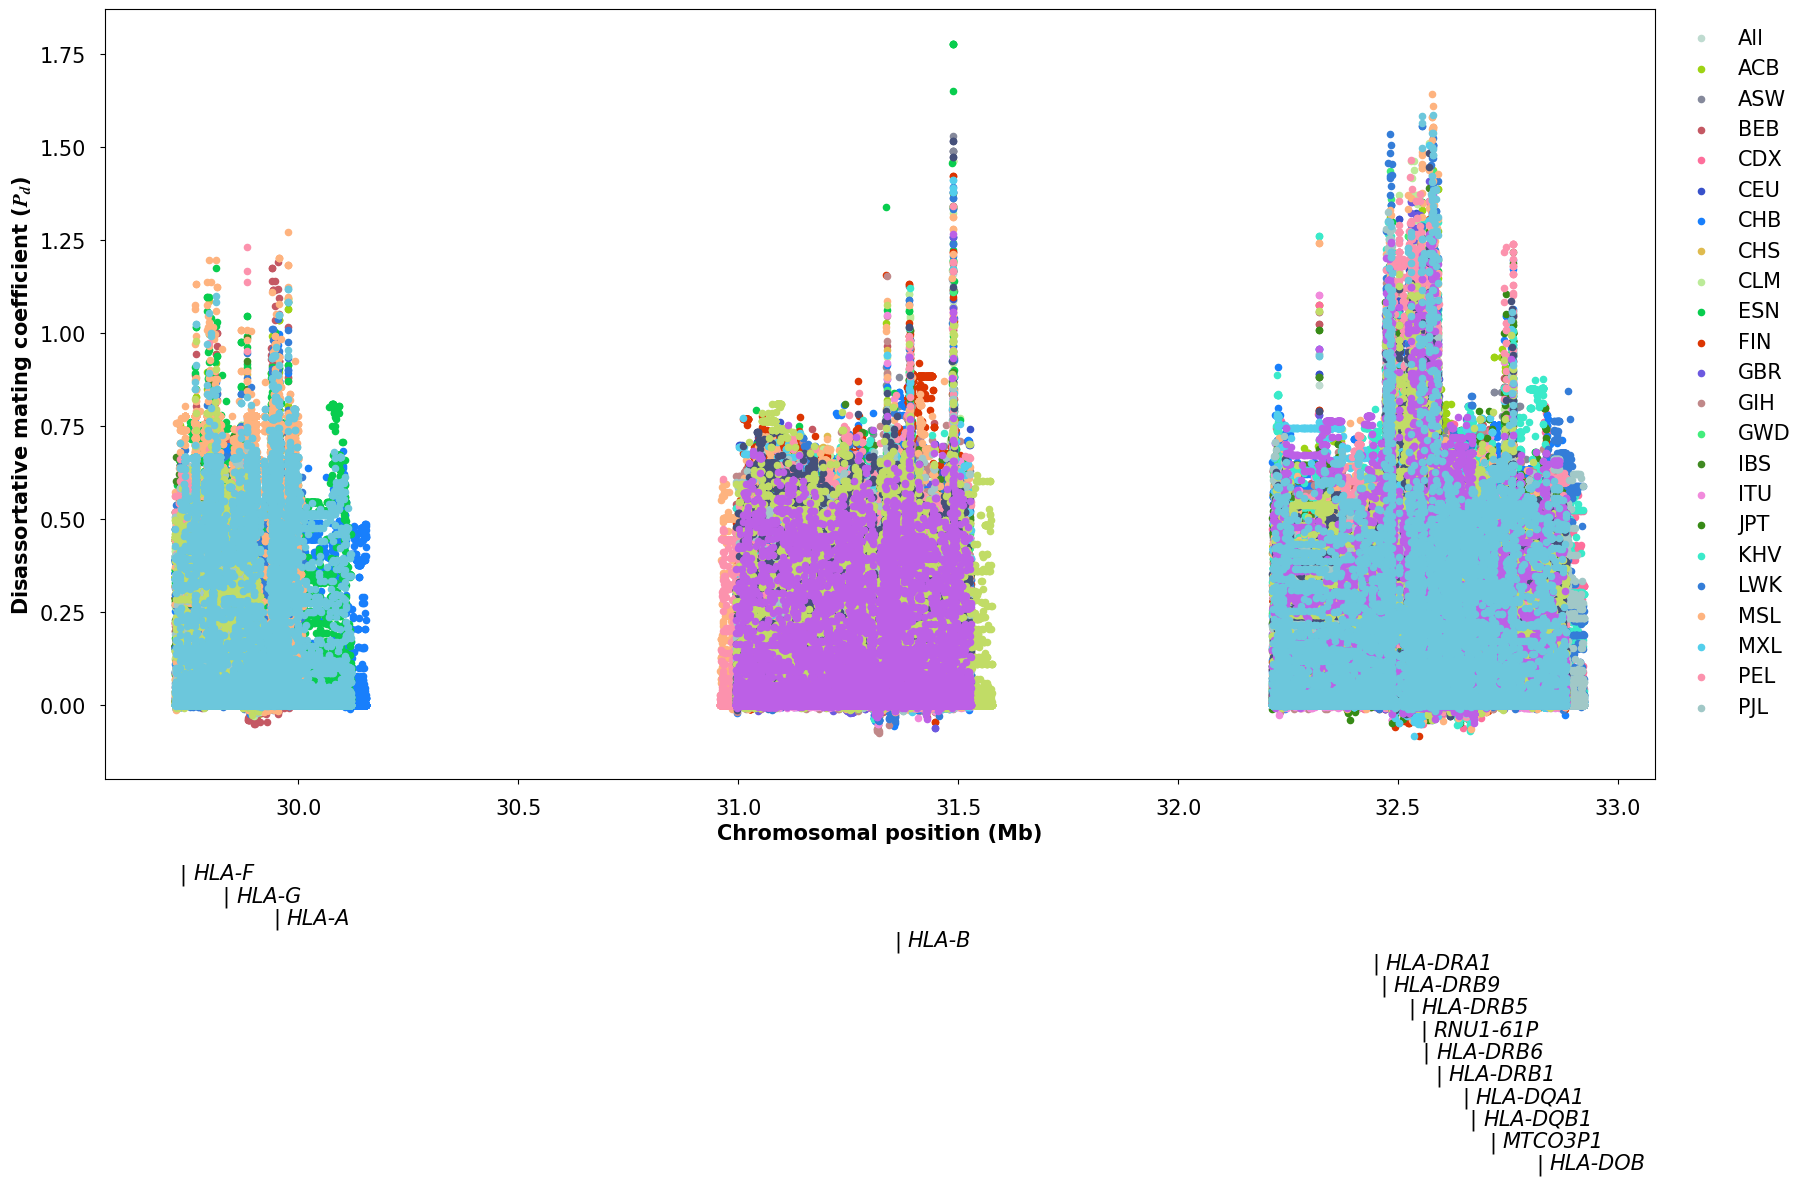

In [20]:
allpositions=[]
allPs=[]
seen_races=set()
plt.figure(figsize=(20,10))
plt.rcParams['grid.linewidth'] = 1.2
# plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic:bold'
for race, regiondict in mhc_race_positions_dict.items():
    if regiondict:
        if race=='All':
            for arr in regiondict["mhc"]:
                xvalues=df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])]["Unnamed: 0"].to_list() 
                allpositions+=xvalues
                yvalues=df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])]["P"].to_list()
                allPs+=yvalues
                #race_color_dict[race] = zipped_color_list[race] 
                plt.scatter(np.array(xvalues) / 1000000 ,yvalues,color=zipped_color_list[race],s=20) # from mb to b
                if race not in seen_races:
                    plt.scatter([], [], color=zipped_color_list[race], s=1, label=race)
                    seen_races.add(race)
        else:
            for arr in regiondict["mhc"]:
                xvalues=df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])]["Unnamed: 0"].to_list()
                allpositions+=xvalues
                yvalues=df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])][race].to_list()
                allPs+=yvalues
               # race_color_dict[race] = zipped_color_list[race]
                plt.scatter(np.array(xvalues) / 1000000 ,yvalues,color=zipped_color_list[race],s=20)  # from mb to b
        
                if race not in seen_races:
                    plt.scatter([], [], color=zipped_color_list[race], s=1, label=race)
                    seen_races.add(race)
            
y_offset = -0.3
for x,y in sort_arr:
    # plt.vlines(x = sim_dict[x], ymin = y_offset-0.01, ymax = y_offset,
        #    colors = 'black')
    # plt.text(x = sim_dict[x]+5000, y = y_offset-0.0085, s=x, fontdict={'fontsize':13})
    plt.text(x = comp_dict[x] / 1000000, y = y_offset-0.17, s="|", fontdict={'fontsize':15})# from mb to b
    plt.text(x = comp_dict[x] / 1000000 + 0.03, y = y_offset-0.17, s=x, fontdict={'fontsize':15}, style='italic')# from mb to b
    y_offset -= 0.06
plt.ylim(-0.2,None)        
                    

plt.tick_params(axis='both', which='major', labelsize=15,pad=10)  
 
# plt.title("Disassortative mating MHC region",fontsize=30)
plt.xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold')
# plt.ylabel(u'P',fontsize=15, weight = 'bold')
plt.ylabel(r"Disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')

order = [ 1, 0,   2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]
handles, labels = plt.gca().get_legend_handles_labels()

legend=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper right",fontsize=15,  bbox_to_anchor=(1.1, 1), frameon=False)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [20] 
#plt.savefig("../../figure_0803/pic3.pdf",dpi=600,bbox_inches = 'tight') 
# plt.savefig("pic3_sim.pdf",dpi=600,bbox_inches = 'tight')
#plt.savefig("../../formalfigs/pic3_mhc_regions_complementary_05_05_compare.png",dpi=300) 
plt.show()      


In [21]:
df_race_mhc

Unnamed: 0       ACB       ASW       BEB       CDX       CEU  \
0         29720403  0.343344  0.224344  0.286216  0.492784  0.221521   
1         29720508  0.288125  0.173056  0.145840  0.147176  0.085134   
2         29720509  0.000404  0.000961  0.000319  0.000620  0.000173   
3         29720635  0.015052  0.000961  0.000319  0.000620  0.000173   
4         29720654  0.000404  0.000961  0.000319  0.000620  0.000173   
...            ...       ...       ...       ...       ...       ...   
108906    33129837  0.338902  0.282408  0.253823  0.333591  0.651601   
108907    33129865  0.000404  0.000961  0.020462  0.000620  0.000173   
108908    33129951  0.000404  0.000961  0.000319  0.000620  0.000173   
108909    33129973  0.007335  0.000961  0.020462  0.000620  0.000173   
108910    33129982  0.000404  0.000961  0.013258  0.000620  0.000173   

             CHB       CHS       CLM       ESN  ...       KHV       LWK  \
0       0.355220  0.318584  0.280589  0.442880  ...  0.343460  0.390530   
1       0.253164  0.122188  0.126818  0.331558  ...  0.291104  0.295362   
2       0.000509  0.000208  0.000314  0.000248  ...  0.000366  0.000549   
3       0.000509  0.000208  0.000314  0.005624  ...  0.000366  0.000549   
4       0.000509  0.000208  0.000314  0.000248  ...  0.014279  0.000549   
...          ...       ...       ...       ...  ...       ...       ...   
108906  0.439568  0.238245  0.416129  0.463642  ...  0.551259  0.370839   
108907  0.000509  0.000208  0.000314  0.000248  ...  0.030072  0.000549   
108908  0.000509  0.000208  0.000314  0.000248  ...  0.000366  0.000549   
108909  0.000509  0.000208  0.000314  0.024439  ...  0.030072  0.000549   
108910  0.000509  0.000208  0.000314  0.000248  ...  0.000366  0.000549   

             MSL       MXL       PEL       PJL       PUR       STU       TSI  \
0       0.442819  0.303011  0.221134  0.401539  0.376454  0.450736  0.247543   
1       0.371037  0.169074  0.089512  0.189385  0.167546  0.224077  0.137235   
2       0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   
3       0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   
4       0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   
...          ...       ...       ...       ...       ...       ...       ...   
108906  0.290992  0.462220  0.108651  0.455143  0.369082  0.506296  0.532677   
108907  0.000549  0.000571  0.000366  0.045863  0.000284  0.007473  0.000473   
108908  0.000549  0.000571  0.000366  0.011845  0.000284  0.000418  0.000473   
108909  0.093049  0.000571  0.000366  0.045863  0.000284  0.007473  0.000473   
108910  0.000549  0.000571  0.000366  0.000258  0.000284  0.000418  0.000473   

             YRI  
0       0.338882  
1       0.337360  
2       0.000175  
3       0.031572  
4       0.000175  
...          ...  
108906  0.271623  
108907  0.000175  
108908  0.000175  
108909  0.009649  
108910  0.000175  

[108911 rows x 27 columns]

In [22]:
df_all_mhc

Unnamed: 0        PA        PB       PAB         P
0         29720403  0.770586  0.229414  0.338428  0.317063
1         29720508  0.875234  0.124766  0.209607  0.197182
2         29720509  0.999064  0.000936  0.001248  0.000520
3         29720635  0.997973  0.002027  0.003431  0.002614
4         29720654  0.999064  0.000936  0.001248  0.000520
...            ...       ...       ...       ...       ...
108906    33129837  0.691360  0.308640  0.394573  0.349929
108907    33129865  0.997037  0.002963  0.005303  0.004474
108908    33129951  0.999064  0.000936  0.001248  0.000520
108909    33129973  0.992358  0.007642  0.014036  0.012467
108910    33129982  0.999064  0.000936  0.001248  0.000520

[108911 rows x 5 columns]

In [23]:
dfs = []
for race, regiondict in mhc_race_positions_dict.items():
    if regiondict:
        if race=='All':
            for arr in regiondict["mhc"]:
                df_sub = df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])][['Unnamed: 0', 'P']]
                df_sub.columns = ['pos', 'P']
                df_sub['type'] = 'All'
                df_sub['region'] = f'{arr[0]}-{arr[1]}'
                dfs.append(df_sub)
        else:
            for arr in regiondict["mhc"]:
                df_sub = df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])][["Unnamed: 0", race]]
                df_sub.columns = ['pos', 'P']
                df_sub['type'] = race
                df_sub['region'] = f'{arr[0]}-{arr[1]}'
                dfs.append(df_sub)
data = pd.concat(dfs).reset_index()     

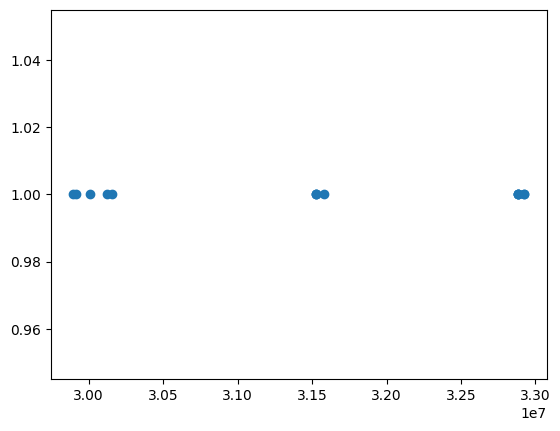

In [24]:
ends = [int(x.split('-')[1] )for x in data.region.unique()]
plt.scatter(ends, y=np.ones(len(ends)))
region_map = {}
for x in data.region.unique():
    s = int(x.split('-')[0])
    e = int(x.split('-')[1])
    if e < 3.05 * 1e7:
        region_map[x] = 'region1'
    elif s > 3.2 * 1e7:
        region_map[x] = 'region3'
    else:
        region_map[x] = 'region2'
data['main_region'] = [region_map[x] for x in data['region']]

In [25]:
data['P_adjust'] = data['P'] - data['P'].min()


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


<Figure size 3000x7500 with 0 Axes>

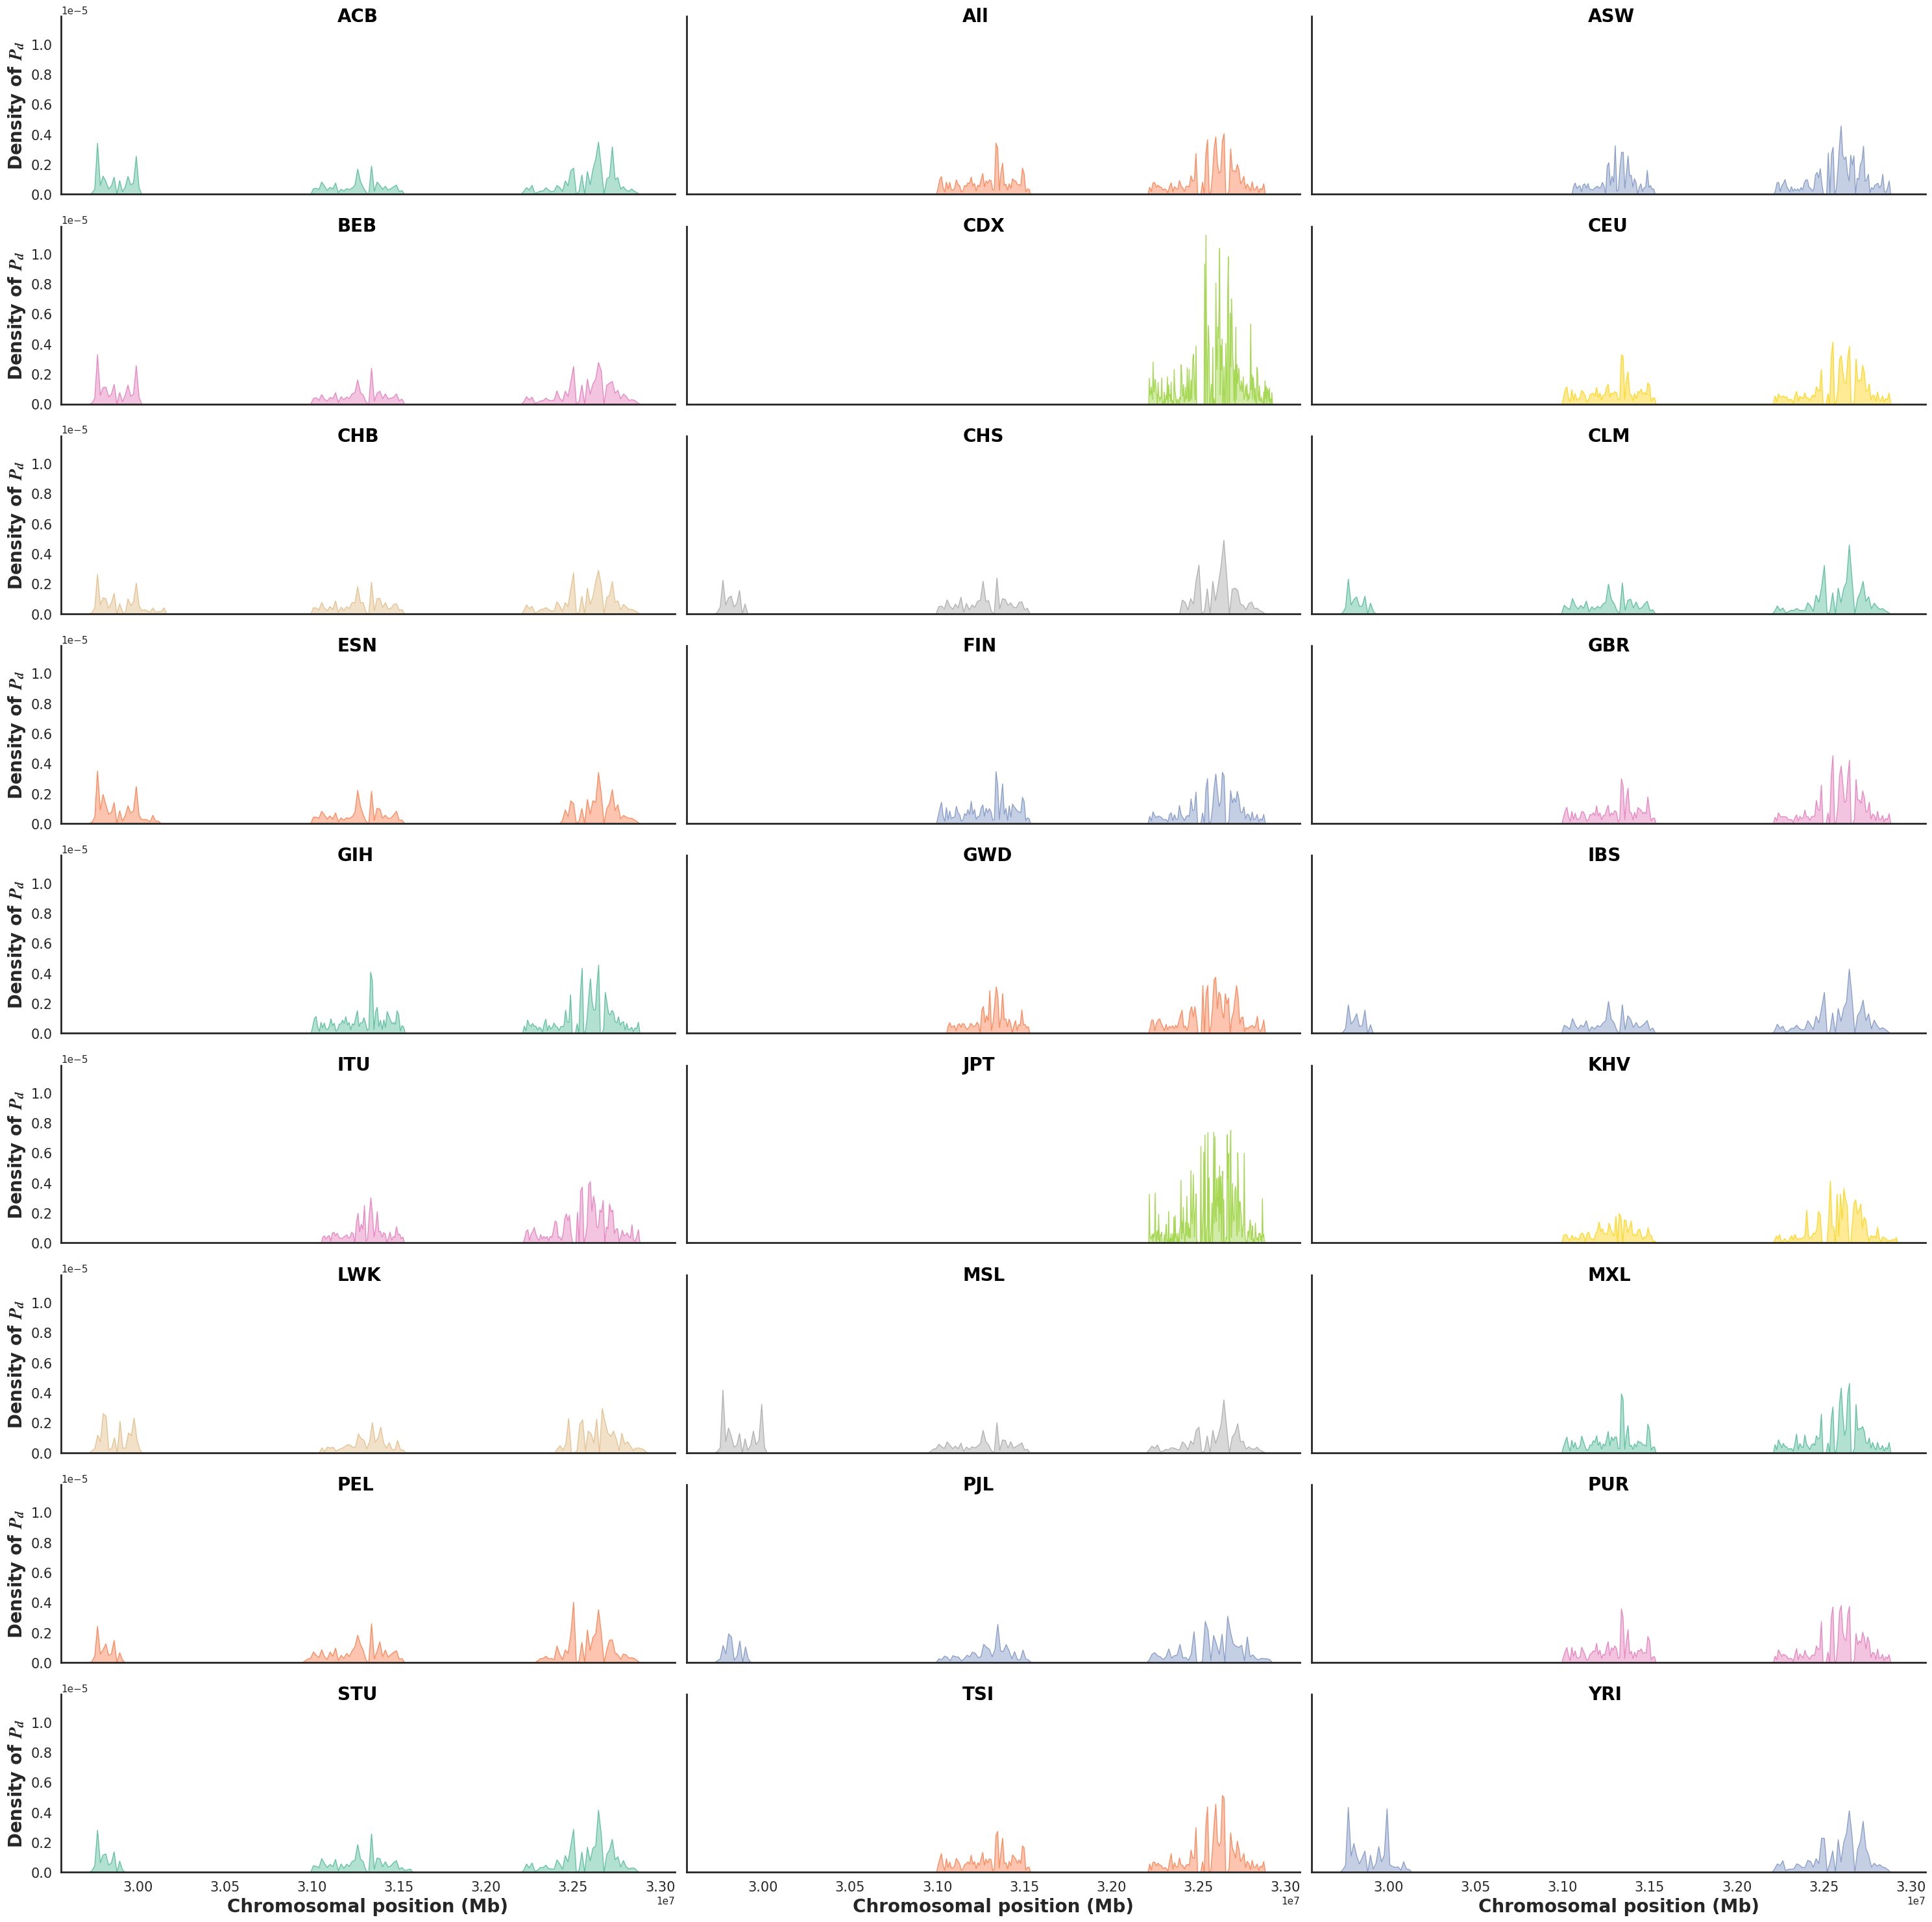

In [26]:
import seaborn as sns
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic:bold'
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
plt.figure(figsize=(30, 75))
g = sns.FacetGrid(data, palette=palette,col="type",hue="type", aspect=3, height=3.3, col_wrap=3)
g.map_dataframe(sns.kdeplot, x="pos", fill=True, alpha=0.5, weights='P_adjust', bw_adjust=.001)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.45, 1, label, color='black', fontsize=20,weight="bold",
            ha="left", va="center", transform=ax.transAxes)
g.map(label,"type")
for ax in g.axes.flat:
    ax.set_xlabel("Chromosomal position (Mb)",fontsize=20,weight="bold")
    ax.set_ylabel("Density of $P_d$",fontsize=20,weight="bold")
    ax.tick_params(labelsize=15)
g.set_titles(col_template="")

In [27]:

#g.map_dataframe(sns.kdeplot, x="pos", color='black', weights='P_adjust', bw_adjust=.02,)

   # ax.set_ylabel("Density", fontsize=15)
#g = sns.catplot(x="X Axis", hue="Class", kind="count", legend=False, data=df, height=5, aspect=7/4)
# def set_custom_yticks(y, **kwargs):
#     ax = plt.gca()
#     ax.set_yticks(np.linspace(0, np.max(y), int(np.max(y)/5)))  # 设置自定义的刻度


# g.map(set_custom_yticks, "pos")



# g.despine( left=True)
# y_offset=0
# # for ax in g.axes.flat:
# for tex,y in sort_arr:
# # plt.vlines(x = sim_dict[x], ymin = y_offset-0.01, ymax = y_offset,
#     #    colors = 'black')
# # plt.text(x = sim_dict[x]+5000, y = y_offset-0.0085, s=x, fontdict={'fontsize':13})
#     g.axes.flat[0].text(x=(comp_dict[tex] / 10000000) *(0.5 /3.127), y=y_offset-0.2, s="|", transform=ax.transAxes, fontsize=15)
#     g.axes.flat[0].text(x=(comp_dict[tex] / 10000000 +0.5) *(0.5 /3.127), y=y_offset-0.2, s=tex, transform=ax.transAxes,fontsize=15)
#     #plt.figtext(x =(comp_dict[x] / 10000000) *(0.5 /3.127), y = y_offset-0.17, s="|", fontdict={'fontsize':15})# from mb to b
#     #plt.figtext(x = comp_dict[x] / 10000000 + 0.03, y = y_offset-0.17, s=x, fontdict={'fontsize':15}, style='italic')# from mb to b
#     y_offset -= 0.06
     

#plt.figtext(0.5, 0.05, "Additional Text", ha='center', fontsize=12)

In [28]:
# for main_region in ['region1', 'region2', 'region3']:
#     data_sub = data[data['main_region'] == main_region]
#     sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
#     palette = sns.color_palette("Set2", 12)
#     plt.figure(figsize=(10, 10))
#     if main_region == 'region3':
#         g = sns.FacetGrid(data_sub, palette=palette, col="type", hue="type", aspect=9, height=1.2, col_wrap=2)
#     else:
#         g = sns.FacetGrid(data_sub, palette=palette, row="type", hue="type", aspect=9, height=1.2)
#     g.map_dataframe(sns.kdeplot, x="pos", fill=True, alpha=0.5, weights='P_adjust', bw_adjust=.001)
#     # g.map_dataframe(sns.kdeplot, x="pos", color='black', weights='P_adjust', bw_adjust=.02,)
#     def label(x, color, label):
#         ax = plt.gca()
#         ax.text(-0.1, 0.2, label, color='black', fontsize=13,
#                 ha="left", va="center", transform=ax.transAxes)

#     g.map(label, "type")
#     g.fig.subplots_adjust(hspace=-.2)
#     g.set_titles("")
#     g.set(yticks=[], xlabel="Pos")
#     g.despine( left=True)
# plt.suptitle('Netflix Originals - IMDB Scores by Language', y=0.98)